# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [26]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, plot_roc_curve

In [ ]:
# from src.call import call_on_students

## Part 1: Gradient Descent

### Set Up

In [2]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [3]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


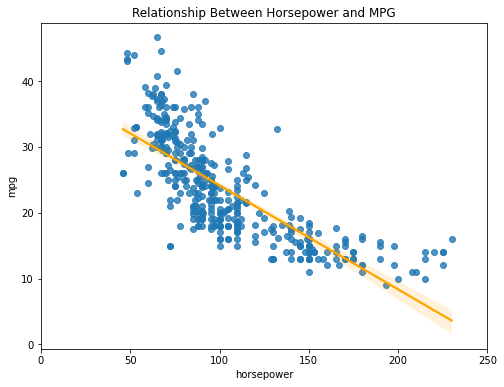

In [4]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

In [ ]:
# call_on_students(1)

#### Answer: 

- rss looks at errors between data point and the prediction (line in horspeoower vs mpg graph)
- slope is the slope of the line
- bottom point in curve is where chnage is zero - that is the optimal slope (around -.157), indicates minimum errors occur at that point

- **lowest point on curve is best rss, therefore best slope (around -.157)

- this can also be done with MSE or RSE



### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

In [ ]:
# call_on_students(1)

- will start at top left and go down 1 step at a time until finding lowest point
- it will only go back up (past the minimum) if step size is too large
-gradient descent takes higher step at the start and gets smaller as you get closer to zero

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

In [ ]:
# call_on_students(1)

#### Answer: 

- step size is how far/large a step to takel; largest at top becasue thats where deriavtive is the largest; step size decreases as derivative gets ssmaller/ approaches the minimum point on curve
-learning rate is a proportion of the derivate to take
- step size based on partial derivative of curve; how much of that partial deriv to take is the step size: 
learning rate helps to decrease the step size but learning rate is a constant - tells us how much of a step size to take


## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

In [ ]:
# call_on_students(1)

#### Answer: 

- classes, categorical, distinct
- outputs probabilities of belongign to a specific class (prob is between 0 and 1) output is the log odds
- logreg output is discrete/categorical, which is different from lin reg where output is continuous
-both logreg and linreg is parametric - have coefficients; difference is logistic coeeficient represents an increase in the log odds where lin coefficients represent a an increase in the target
- non parametric (like knn) has no parameters


### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

In [ ]:
# call_on_students(1)

#### Answer: 

- log reg compared with other classficiation models: 

pro: 
- advantage is it's less prone to overfitting
- more interpretable than other classificationj models
- 

con: 
 - log reg doesnt handle imbalanced data as well
  - log reg doesnt deal with multicollinearity well at all
  -


## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [5]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [6]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [ ]:
# call_on_students(1)

In [8]:
# Train-test split
# Set test_size=0.33 and random_state=42

X = mpg_class.drop('target', axis=1)
y = mpg_class.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state=42)


In [9]:
# Scale the data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [ ]:
# call_on_students(1)

#### Part 1: explore the target column breakdown in train data

In [10]:
# Code to explore

y_train.value_counts(normalize=True)


0    0.744275
1    0.255725
Name: target, dtype: float64

#### Answer:

- baseline predicts the majority class (0 in this case) ; will yield 74.4% accuracy


#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- 74.4%


#### Part 3: How accurate would that baseline be on test data?


In [11]:
# Code to find the answer
y_test.value_counts(normalize=True)

0    0.753846
1    0.246154
Name: target, dtype: float64

#### Answer:

- pretty accurate


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [ ]:
# call_on_students(1)

#### Answer:

- not actually imbalanced in this example but lets pretend it is):
- imbalanced data: rule of thumb is around 90-10 (% of data in each category) (not actually imbalanced in this example but lets pretend it is):
- could use SMOTE to synthetically oversample the minority class
-undersampling not recommended in this case due to not enough data (under 10k) - you dont want to drop data when theres not enouhg to begin with
- can also use weighted sampling

### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [ ]:
# call_on_students(1)

In [12]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42)

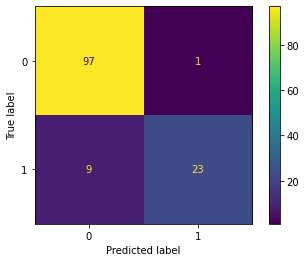

In [13]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(logreg, X_test_scaled, y_test)

### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [ ]:
truepos = 23
trueneg = 97
falsepos = 1
falseneg = 9

In [14]:
y_pred = logreg.predict(X_test_scaled)

In [15]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [ ]:
# call_on_students(1)

In [16]:
# Accuracy
accuracy_score(y_test, y_pred)

0.9230769230769231

In [ ]:
# or by hand: (truepos + trueneg) / (truepos + trueneg + falsepos + falseneg)

In [17]:
logreg.score(X_test_scaled, y_test)

0.9230769230769231

In [18]:
# Precision

precision_score(y_test, y_pred)

0.9583333333333334

In [ ]:
#precision by hand: (truepos) / (truepos + falsepos)

In [19]:
# Recall
recall_score(y_test, y_pred)

0.71875

In [ ]:
#recall by hand: (truepos) / (truepos + falseneg)

In [20]:
# F1-Score
f1_score(y_test, y_pred)

0.8214285714285714

In [ ]:
# f1 by hand: 2* 

### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [ ]:
# call_on_students(1)

In [22]:
#find probability 
y_score = logreg.predict_proba(X_test_scaled)
y_score

array([[9.97117884e-01, 2.88211554e-03],
       [9.95334221e-01, 4.66577929e-03],
       [9.99860889e-01, 1.39110635e-04],
       [9.97699595e-01, 2.30040460e-03],
       [9.99634518e-01, 3.65481656e-04],
       [9.99043618e-01, 9.56382448e-04],
       [2.79904115e-03, 9.97200959e-01],
       [9.99026897e-01, 9.73103080e-04],
       [9.33336333e-01, 6.66636668e-02],
       [9.99464221e-01, 5.35778541e-04],
       [8.93497133e-03, 9.91065029e-01],
       [9.57162834e-01, 4.28371664e-02],
       [1.54609949e-01, 8.45390051e-01],
       [9.98638756e-01, 1.36124411e-03],
       [9.11830111e-01, 8.81698888e-02],
       [9.99686066e-01, 3.13933548e-04],
       [9.39695786e-01, 6.03042137e-02],
       [9.99734687e-01, 2.65313401e-04],
       [9.99421021e-01, 5.78978925e-04],
       [9.99475392e-01, 5.24607746e-04],
       [8.74667951e-01, 1.25332049e-01],
       [9.99923819e-01, 7.61806157e-05],
       [9.99914240e-01, 8.57600530e-05],
       [1.32938166e-01, 8.67061834e-01],
       [9.993896

In [23]:
#pick the 2nd one in each row - probability that its a member of the 1 class; starts with 2.88
y_score = logreg.predict_proba(X_test_scaled)[:, 1]
y_score

array([2.88211554e-03, 4.66577929e-03, 1.39110635e-04, 2.30040460e-03,
       3.65481656e-04, 9.56382448e-04, 9.97200959e-01, 9.73103080e-04,
       6.66636668e-02, 5.35778541e-04, 9.91065029e-01, 4.28371664e-02,
       8.45390051e-01, 1.36124411e-03, 8.81698888e-02, 3.13933548e-04,
       6.03042137e-02, 2.65313401e-04, 5.78978925e-04, 5.24607746e-04,
       1.25332049e-01, 7.61806157e-05, 8.57600530e-05, 8.67061834e-01,
       6.10344912e-04, 3.70596692e-03, 3.16963718e-02, 3.55067473e-01,
       7.97034531e-04, 8.03000867e-03, 9.47397282e-01, 2.14512246e-02,
       2.14283145e-01, 5.59151712e-04, 9.81588597e-01, 6.04199292e-05,
       9.65393863e-01, 2.39633260e-03, 9.66323397e-01, 9.99312202e-01,
       9.25243170e-01, 1.12718485e-03, 5.35187366e-05, 1.74465054e-03,
       9.67079081e-01, 9.98817896e-01, 2.81251779e-01, 1.54823217e-04,
       3.73172409e-03, 3.01269772e-04, 9.81312227e-01, 9.71495990e-03,
       7.19653335e-03, 1.70555661e-04, 4.01109500e-03, 3.35217499e-01,
      

In [24]:
# Calculate roc-auc
roc_auc_score(y_test, y_score)

0.9811862244897959

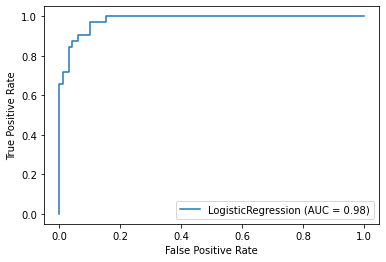

In [25]:
# Plot the ROC curve
plot_roc_curve(logreg, X_test_scaled, y_test)

In [ ]:
# 1 is perfect score, zero is bad score
# tells us the false postive rate ()

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

In [ ]:
# call_on_students(1)

In [27]:
print(classification_report(y_test, y_pred))
#macro avg is what to look at - want as high as possible (but less than 1 which would mean overfitting )

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        98
           1       0.96      0.72      0.82        32

    accuracy                           0.92       130
   macro avg       0.94      0.85      0.89       130
weighted avg       0.93      0.92      0.92       130



#### Answer:

- model looks good based on all the metrics (roc, accuracy, recall, precision, etc)


## Part 4: Decision Trees

### Set Up - Generating 1-split trees to compare

In [28]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

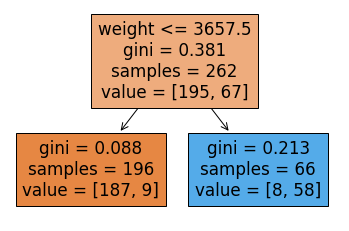

In [29]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, feature_names=['weight'], filled=True);

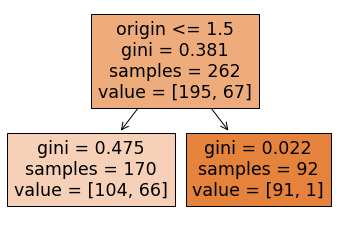

In [30]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, feature_names=['origin'], filled=True);

#### Result: 

(showing the image output incase there is a problem with the above code to generate and visualize these trees)

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- lower gini value means less disorder, which is good; tree 1 has lower gini scores


### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [ ]:
# call_on_students(1)

In [31]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(random_state=42)

In [32]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

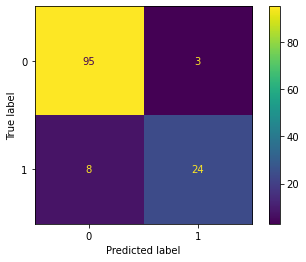

In [33]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(dt, X_test, y_test)

In [ ]:
# with decision tree, no need to use scaled data
# with KNN, you do need to scale

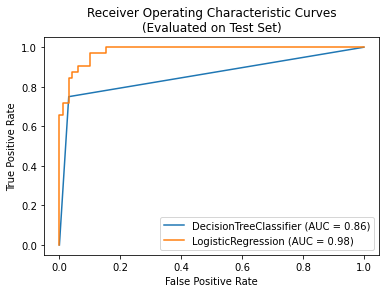

In [34]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(logreg, X_test_scaled, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- logsitic bc it has a higher AUC-ROC score(.98) (area under the curve showing relationship between false pos and true pos)
 - the .98 tells you area under the curve
